<a href="https://colab.research.google.com/github/Amisha2778/AI-ML-Month/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MAJOR PROJECT
TOPIC : TWITTER SENTIMENT ANALYSIS

BY:

DIYA KHAJURIA (ECE AI 1, 2nd SEMESTER, 05001182021)

AMISHA SHARMA (ECE AI 1, 2nd SEMESTER, 05301182021)

AYUSHI (ECE AI 1, 2nd SEMESTER, 04101182021)

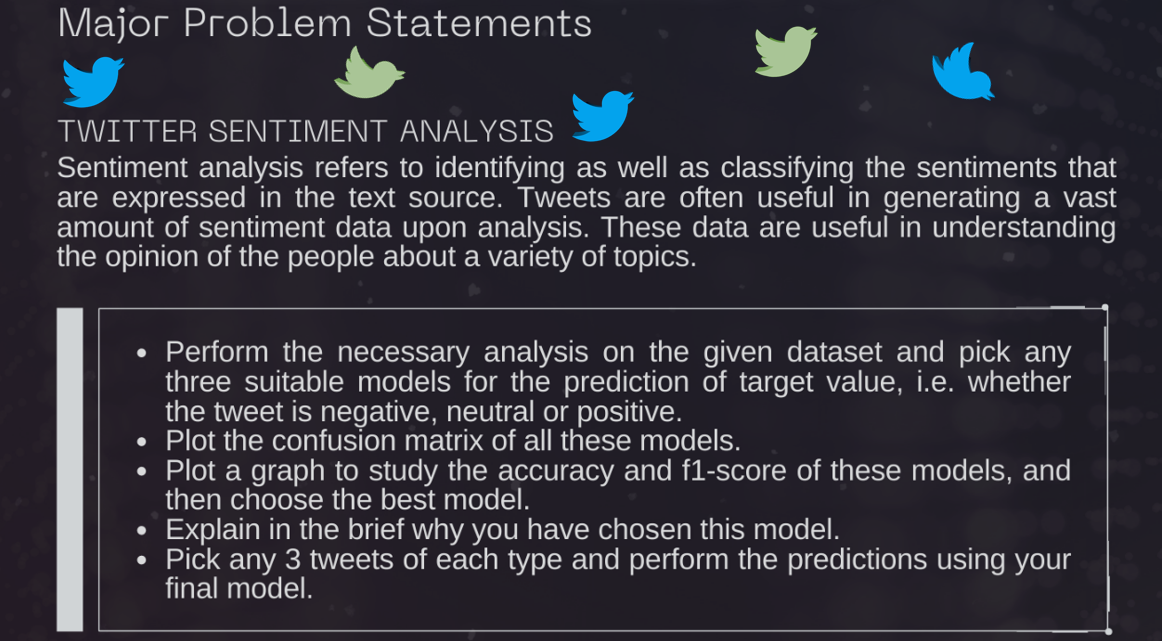

#WHAT IS SENTIMENT ANALYSIS?

Sentiment analysis is a technique through which you can analyze a piece of text to determine the sentiment behind it. It combines machine learning and natural language processing (NLP) to achieve this.

Using basic Sentiment analysis, a program can understand whether the sentiment behind a piece of text is positive, negative, or neutral.

###INSTRUCTIONS TO BE FOLLOWED:
1. Create a jupyter notebook or a colab notebook.
2. Show all the calculations required and print them.
3. The final calculation for the answer must be in a separate cell.
4. Create a text cell to give explanations wherever you think is necessary.
5. The visualization questions must be accompanied with an explanation as well as conclusions.
6. Write all the answers in point form. Answers must be to the point.

STEP 1: Uploading dataset 

STEP 2: Importing all the required modules

In [ ]:
# IMPORTING MODULES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings 
warnings.filterwarnings('ignore')

In [ ]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

import tensorflow as tf
print("Tensorflow Version",tf.__version__)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Tensorflow Version 2.9.2


##Data analysis

STEP 3: Adding column headers as our dataset is missing column headers.

In [ ]:
# DATASET MISSING COLUMN HEADERS
import csv
col = ['sentiment','ids','date','flag','user','text']
df= pd.read_csv( 'twitter_analysis.csv', engine= 'python',encoding = 'latin', names=col,error_bad_lines=False)


STEP 4: 

In [ ]:
df.shape

(1600000, 6)

In [ ]:
df.columns

Index(['sentiment', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [ ]:
df.head()

,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.describe()

,sentiment,ids
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [ ]:
df.info

<bound method DataFrame.info of          sentiment         ids                          date      flag  \
0                0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1                0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2                0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3                0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4                0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
...            ...         ...                           ...       ...   
1599995          4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996          4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997          4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998          4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599999          4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                    user                                               text  
0

In [ ]:
df.isnull().sum() #prints the column having null value


sentiment    0
ids          0
date         0
flag         0
user         0
text         0
dtype: int64

In [ ]:
print(df['sentiment'].unique()) #print unique values (0 is for negative sentiments and 4 for positive)

[0 4]


STEP 5: Plot data as per your need. Here, we have used count plot and pie chart.

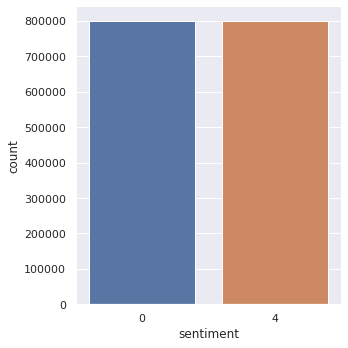

In [ ]:
sns.catplot( #plot data as per your need (cat stands for categorical plot)
    x='sentiment',
    data=df,
    height=5,
    aspect=1,
    kind='count'
).set_axis_labels('sentiment', 'count')

plt.show()



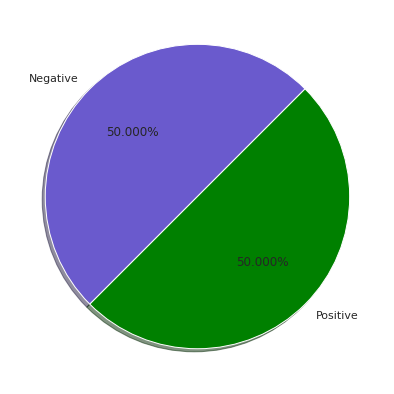

In [ ]:
# RATIO 
fig = plt.figure(figsize=(7,7))#width and height
colours = ["slateblue", "green"]
Negative = df[df['sentiment']== 0]
Positive = df[df['sentiment']== 4]
senti_measure = [Positive['sentiment'].count(),Negative['sentiment'].count()] #to count +ve and -ve sentiments
senti_Pie = plt.pie(senti_measure, #to plot pie chart
                 labels= ['Negative', 'Positive'], 
                 autopct ='%.3f%%', 
                 shadow = True,
                 colors=colours,
                 startangle = 45)
                #  explode=(0, 0.1))

STEP 6: MAPPING 0 AND 4 TO THE WORDS NEGATIVE AND POSITIVE USING LAMBDA FUNCTION

In [ ]:
lab_to_sentiment = {0:"Negative", 4:"Positive"}
def label_decoder(label): #function that tells if the sentiment is neg or pos
  return lab_to_sentiment[label]
df.sentiment = df.sentiment.apply(lambda x: label_decoder(x)) #calling function for all the sentiments in the dataset
df.head()#printing first 5 rows

,sentiment,ids,date,flag,user,text
0,Negative,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,Negative,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,Negative,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,Negative,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
#temp
#data=df[['text','sentiment']]
data_pos = df[df['sentiment'] == 4]
data_neg = df[df['sentiment'] == 0]
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]
#dataset = pd.concat([data_pos, data_neg])
df['text']=df['text'].str.lower()
df['text'].tail()

1599995    just woke up. having no school is the best fee...
1599996    thewdb.com - very cool to hear old walt interv...
1599997    are you ready for your mojo makeover? ask me f...
1599998    happy 38th birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @thenspcc @sparkscharity...
Name: text, dtype: object

STEP 7: GENERATING RANDOM NUMBERS AS INDEXES 

In [ ]:
import random
random_idx_list = [random.randint(1,len(df.text)) for i in range(10)] # creates random indexes to choose from dataframe
df.loc[random_idx_list,:].head(10) # Returns the rows with the index and display it

,sentiment,ids,date,flag,user,text
512654,Negative,2190192805,Tue Jun 16 02:01:54 PDT 2009,NO_QUERY,gw212,byee guysss
1331302,Positive,2015971194,Wed Jun 03 05:54:48 PDT 2009,NO_QUERY,sojufied,good night~ sweet dreams~
998129,Positive,1836206287,Mon May 18 07:34:33 PDT 2009,NO_QUERY,erinnncatherine,my ancestor invented the toilet. how cool is t...
937693,Positive,1793287595,Thu May 14 02:06:21 PDT 2009,NO_QUERY,csswizardry,@simonwiffen @13thoughts http://twitter.com/cs...
1247751,Positive,1995615675,Mon Jun 01 13:46:29 PDT 2009,NO_QUERY,DougsButtercup,have finished typing an email and i'm now play...
1534673,Positive,2178815796,Mon Jun 15 08:14:40 PDT 2009,NO_QUERY,Nephilim1326,good morning world =] todays gonna be a good day
417110,Negative,2061461943,Sat Jun 06 20:55:17 PDT 2009,NO_QUERY,diertac,"@erbower oh no, really??? we had such a diff...."
467722,Negative,2175841282,Mon Jun 15 02:09:13 PDT 2009,NO_QUERY,livileah88,will it look silly if i take a teddy with me?i...
982283,Positive,1834190046,Mon May 18 01:58:49 PDT 2009,NO_QUERY,st3fft,@beverly yea.u'll use e fake ones 4 a while &a...
1015213,Positive,1881538206,Fri May 22 04:56:02 PDT 2009,NO_QUERY,KatMcGraw,"if it weren't for my kids, i'd ... nevermind."


###TEXT PRE-PROCESSING



*   STEMMING
*   LEMMATIZATION
*   REMOVAL OF STOPWORDS
*   REMOVAL OF HYPERLINKS AND MENTIONS IN TWEETS



STEP 8: Data cleaning

In [ ]:
df['text'].tail()

1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: text, dtype: object

In [ ]:
df['text'].head()

0    @switchfoot http://twitpic.com/2y1zl - Awww, t...
1    is upset that he can't update his Facebook by ...
2    @Kenichan I dived many times for the ball. Man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it's not behaving at all....
Name: text, dtype: object

In [ ]:
# new stemming
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
df['text']= df['text'].apply(lambda x: stemming_on_text(x))
df['text'].tail()

1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: text, dtype: object

In [ ]:
# new stopwords
stop_words = stopwords.words('english') #words like a, an, the etc(commonly used)
STOPWORDS = set(stop_words)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['text'] = df['text'].apply(lambda text: cleaning_stopwords(text))
df['text'].tail()

1599995        Just woke up. Having school best feeling ever
1599996    TheWDB.com - Very cool hear old Walt interview...
1599997                 Are ready MoJo Makeover? Ask details
1599998    Happy 38th Birthday boo alll time!!! Tupac Ama...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: text, dtype: object

In [ ]:
stop_words = stopwords.words('english') #words like a, an, the etc(commonly used)
stemmer = SnowballStemmer('english') #changes words to their base forms like cared to care

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"#to remove these characters

In [ ]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)
df['text'].tail()

1599995        Just woke up. Having school best feeling ever
1599996    TheWDB.com - Very cool hear old Walt interview...
1599997                 Are ready MoJo Makeover? Ask details
1599998    Happy 38th Birthday boo alll time!!! Tupac Ama...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: text, dtype: object

In [ ]:
#temp
df['text'] = df['text'].apply(lambda x: preprocess(x))
df['text'].tail()

1599995                        woke school best feeling ever
1599996             thewdb com cool hear old walt interviews
1599997                      ready mojo makeover ask details
1599998    happy 38th birthday boo alll time tupac amaru ...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, dtype: object

In [ ]:
#temp
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df['text']= df['text'].apply(lambda x: cleaning_punctuations(x))
df['text'].tail()

1599995                        woke school best feeling ever
1599996             thewdb com cool hear old walt interviews
1599997                      ready mojo makeover ask details
1599998    happy 38th birthday boo alll time tupac amaru ...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, dtype: object

In [ ]:
#temp
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
df['text'] = df['text'].apply(lambda x: cleaning_repeating_char(x))
df['text'].tail()

1599995                        woke school best feeling ever
1599996    thewdbcom cool hear old walt interviews httpbl...
1599997                      ready mojo makeover ask details
1599998    happy 38th birthday boo alll time tupac amaru ...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, dtype: object

In [ ]:
#temp
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df['text'] = df['text'].apply(lambda x: cleaning_URLs(x))
df['text'].head()

0    @switchfoot  s bummer. You shoulda got David C...
1    upset can't update Facebook texting it... migh...
2    @Kenichan I dived many times ball. Managed sav...
3                     whole body feels itchy like fire
4    @nationwideclass no, behaving all. i'm mad. he...
Name: text, dtype: object

In [ ]:
#temp
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df['text'] = df['text'].apply(lambda x: cleaning_numbers(x))
df['text'].tail()

1599995                        woke school best feeling ever
1599996    thewdbcom cool hear old walt interviews httpbl...
1599997                      ready mojo makeover ask details
1599998    happy th birthday boo alll time tupac amaru sh...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, dtype: object

In [ ]:
df.text = df.text.apply(lambda x: preprocess(x))

STEP 9: Printing positive and negative workcloud.

#### POSITIVE WORDCLOUD

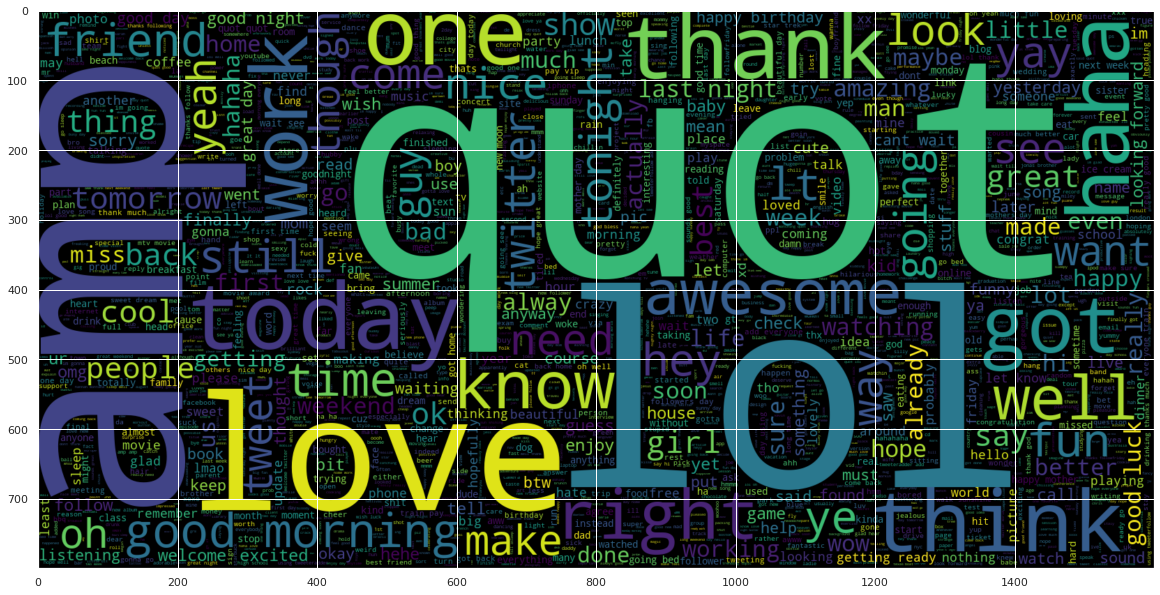

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Positive'].text))
plt.imshow(wc , interpolation = 'bilinear')

####NEGATIVE WORDCLOUD

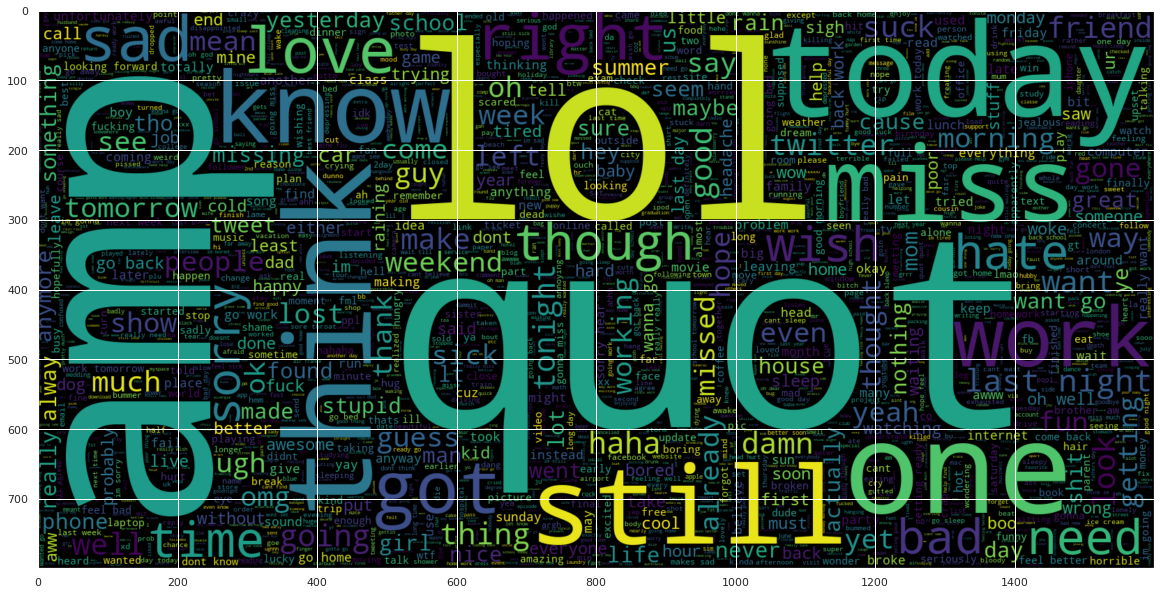

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

STEP 10: Selecting data to train and test.(80% of the data is used to train and the rest 20% is used to test.)

In [ ]:
TRAIN_SIZE = 0.80 #80% of datset is used for training
MAX_NB_WORDS = 100000 #max no of words to consider as features for tokenizer
MAX_SEQUENCE_LENGTH = 30 #cuts off text after this no of words

In [ ]:
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 1280000
Test Data size 320000


In [ ]:
train_data.head(10) #prints top 10 rows of train_data dataset i.e. data that is used to train the machine

,sentiment,ids,date,flag,user,text
23786,Negative,1557814017,Sun Apr 19 06:07:16 PDT 2009,NO_QUERY,anfieldchick,need friends
182699,Negative,1967234035,Fri May 29 19:12:32 PDT 2009,NO_QUERY,carolinee82,im trying call impossible
476661,Negative,2177945142,Mon Jun 15 06:57:29 PDT 2009,NO_QUERY,lynnmclellan,good pace going 3k 13 min missed 5k turn ended...
1181490,Positive,1982098562,Sun May 31 10:31:26 PDT 2009,NO_QUERY,Naimahkinz,u gonna shows ny soon luv see u live
878773,Positive,1685305511,Sat May 02 23:50:16 PDT 2009,NO_QUERY,primehex,hell yea get em tattoos ink free wish parents ...
130866,Negative,1835398318,Mon May 18 05:54:07 PDT 2009,NO_QUERY,fanfrkntastic,yeah need 2 see ur mom calls back first rememb...
1235876,Positive,1992688660,Mon Jun 01 09:09:47 PDT 2009,NO_QUERY,ktbeeper,sounds like cup tea sign
717314,Negative,2259961919,Sat Jun 20 18:26:50 PDT 2009,NO_QUERY,guitarstikibars,tired want sleep wtf
969880,Positive,1827987609,Sun May 17 11:51:37 PDT 2009,NO_QUERY,susanananananaa,amazing wish
748698,Negative,2284535685,Mon Jun 22 14:00:12 PDT 2009,NO_QUERY,BethTN09,thank god wkrn abc affiliate nashville back mi...


STEP 11: Breaking the raw text into small chunks so that it helps in understanding the context or developing the model for NLP. We have used tokenizer by Keras.

###TOKENIZATION(breaking bigger texts into smaller chunks called TOKENS)

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text) #used to update the internal vocabulary for the text list

word_index = tokenizer.word_index #each word is assigned a unique integer in this dict 
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 312392


In [ ]:
from keras.preprocessing.sequence import pad_sequences #used to ensure that all sequences in list have same length
#text to sequence class allows to vectorize a text corpus, by turning each text into either a sequence of integers (each integer being the index of a token in a dictionary) or into a vector where the coefficient for each token could be binary, based on word count
x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (1519999, 30)
Testing X Shape: (80001, 30)


In [ ]:
x_train


array([[   0,    0,    0, ...,    0,   34,  110],
       [   0,    0,    0, ...,  133,  220, 2319],
       [   0,    0,    0, ..., 5649, 9960, 1060],
       ...,
       [   0,    0,    0, ...,  118, 1157,  687],
       [   0,    0,    0, ...,    1,  247,  107],
       [   0,    0,    0, ...,  665, 1308, 1868]], dtype=int32)

In [ ]:
labels = train_data.sentiment.unique().tolist()


In [ ]:
encoder = LabelEncoder()
encoder.fit(train_data.sentiment.to_list())

y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (1519999, 1)
y_test shape: (80001, 1)


In [ ]:
y_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

STEP 12- Pre-trained Word embedding using Glove in NLP models

###  WORD EMBEDDING: VECTORIZATION

* GloVe is a very powerful word vector learning technique.
* Word vectors put words to a nice vector space, where similar words cluster together and different words repel. 
* The advantage of GloVe is that, unlike Word2vec, GloVe does not rely just on local statistics (local context information of words), but incorporates global statistics (word co-occurrence) to obtain word vectors.

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2022-07-09 19:11:00--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-07-09 19:11:00--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-07-09 19:11:01--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
GLOVE_EMB = '/content/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = '.../output/kaggle/working/best_model.hdf5'

In [ ]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [ ]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [ ]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

STEP 13- TRAINING CLEAN AND PRE-PROCESSED DATA ON THE MACHINE LEARNING MODEL, LSTM USING TENSERFLOW KERAS.

# **LSTM**

* LSTM networks are an extension of recurrent neural networks (RNNs) mainly introduced to handle situations where RNNs fail.
 
* RNN is a network that works on the present input by taking into consideration the previous output (feedback) and storing in its memory for a short period of time (short-term memory). 

## MODEL TRAINING -- LSTM

In [ ]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
LSTMmodel=LSTM()

In [ ]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [ ]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Training on CPU...


In [ ]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
1250/1250 [==============================] - 1416s 1s/step - loss: 0.5205 - accuracy: 0.7386 - val_loss: 0.4834 - val_accuracy: 0.7641 - lr: 0.0010
Epoch 2/10
1250/1250 [==============================] - 1412s 1s/step - loss: 0.4884 - accuracy: 0.7616 - val_loss: 0.4709 - val_accuracy: 0.7728 - lr: 0.0010
Epoch 3/10
1250/1250 [==============================] - 1446s 1s/step - loss: 0.4776 - accuracy: 0.7688 - val_loss: 0.4711 - val_accuracy: 0.7745 - lr: 0.0010
Epoch 4/10
1250/1250 [==============================] - 1423s 1s/step - loss: 0.4713 - accuracy: 0.7728 - val_loss: 0.4640 - val_accuracy: 0.7772 - lr: 0.0010
Epoch 5/10
1250/1250 [==============================] - 1426s 1s/step - loss: 0.4664 - accuracy: 0.7759 - val_loss: 0.4623 - val_accuracy: 0.7777 - lr: 0.0010
Epoch 6/10
1250/1250 [==============================] - 1430s 1s/step - loss: 0.4633 - accuracy: 0.7776 - val_loss: 0.4598 - val_accuracy: 0.7796 - lr: 0.0010
Epoch 7/10
1250/1250 [========================

## MODEL EVALUATION, VARIOUS CONFUSION MATRICES AND METRIC GRAPH EVALUATION OF LSTM MODEL


METRIC EVALUATION

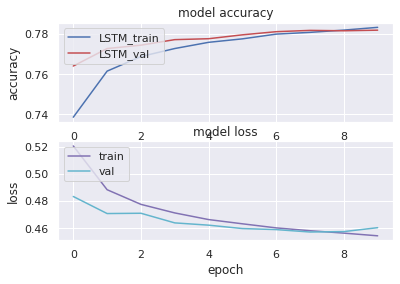

In [ ]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

### **Confusion Matrix**
* It is a performance measurement for machine learning classification problem where output can be two or more classes. 

* It is a table with 4 different combinations of predicted and actual values and gives us a matrix as output and describes the complete performance of the model. 

* Below is the terminology involved in the Confusion Matrix.

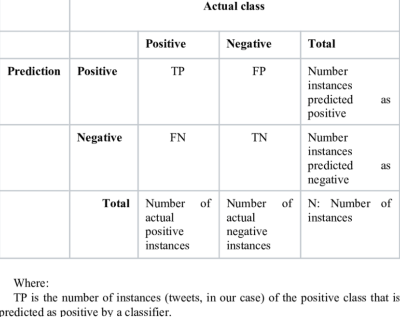

* True Positive:

  Interpretation: You predicted positive and it’s true.

  You predicted that a Tweet is racist and Tweet actually is.

* True Negative:

  Interpretation: You predicted negative and it’s true.

  You predicted that a Tweet is not racist and Tweet actually is not.

* False Positive: (Type 1 Error)

  Interpretation: You predicted positive and it’s false.

  You predicted that a Tweet is racist but Tweet is actually is not.

* False Negative: (Type 2 Error)

  Interpretation: You predicted negative and it’s false.

  You predicted that a Tweet is not racist but Tweet actually is.

CONFUSION MATRIX

In [ ]:
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"


scores = model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

32/32 [==============================] - 78s 2s/step


In [ ]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

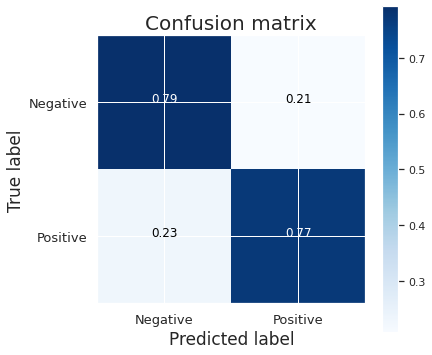

In [ ]:
cnf_matrix = confusion_matrix(test_data.sentiment.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data.sentiment.unique(), title="Confusion matrix")
plt.show()

MODEL EVALUATION

In [ ]:
print(classification_report(list(test_data.sentiment), y_pred_1d))

              precision    recall  f1-score   support

    Negative       0.78      0.79      0.78    160542
    Positive       0.79      0.77      0.78    159458

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



For Classification, Accuracy will be a good evaluator for the models. This is the most commonly used metric to evaluate how well the machine learning model is doing. Accuracy is the ratio of the number of correct predictions made against the total number of predictions made.

Accuracy = (TP + TN)/(Total Number of Samples)

* F1 Score is the Harmonic Mean between precision and recall. 
The range for the F1 Score is [0, 1]. 
* It tells you how precise your classifier is (how many instances it classifies correctly), as well as how robust it is (it does not miss a significant number of instances). 

* High precision but lower recall, gives you an extremely accurate, but it then misses a large number of instances that are difficult to classify.

* Precision: It is the number of correct positive results divided by   the number of positive results predicted by the classifier.

* Recall: It is the number of correct positive results divided by the number of all relevant samples (all samples that should have been identified as positive).

### **CONCLUSIONS**

* We have obtained an accuracy  of 78 % using the LSTM machine learning algorithm.






## **XGBOOST**

* Boosting is one such technique that uses the concept of ensemble learning. A boosting algorithm combines multiple simple models to generate the final output. 
* The working procedure of XGBoost is that it combines the predictions from multiple decision trees. All the weak learners in a gradient boosting machine are decision trees. 
* The trees in XGBoost are built sequentially, trying to correct the errors of the previous trees.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,f1_score
import xgboost as xgb
#import xgb.XGBClassifier
xgb_model = xgb.XGBClassifier(max_depth=6,n_estimators=1000).fit(x_train,y_train)
prediction=xgb_model.predict(x_train)

In [ ]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(x_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    print(accuracy_score(y_test,y_pred))
    print(f1_score(y_test,y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = True, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.73      0.71      0.72    160542
           1       0.71      0.74      0.73    159458

    accuracy                           0.72    320000
   macro avg       0.72      0.72      0.72    320000
weighted avg       0.72      0.72      0.72    320000

0.723453125
0.7274082607664418


(1600000, 6)

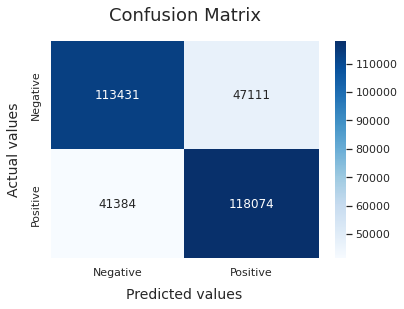

In [ ]:
model_Evaluate(xgb_model)#xgb,x_train,x_test,y_train,y_test,prediction)
df.shape
#sns.heatmap(corr,annot = True,linewidths=0.2,fmt=".2f")
# MODEL_ID=[]
# F1Score=[]
# MODEL_ID.append('XGBOOST')
# accuracy=[]
# accuracy.append(accuracy_score(y_test,y_pred))
# F1Score.append(f1_score(y_test,y_pred))

### **CONCLUSION**

WE OBTAINED ACCURACY AS 72% AFTER TRAINING THE DATA ON XGBOOST ML MODEL.

## **RANDOM FOREST**

Random forest is a supervised learning algorithm. It can be used both for classification and regression. It is also the most flexible and easy to use the algorithm. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is.

###MODEL TRAINING - RANDOM FOREST


In [ ]:
# forest = RandomForestClassifier()
# forest.fit(x_train, y_train)
# y_pred = forest.predict(x_test)
# print("Training Accuracy :", forest.score(x_train, y_train))
# print("Validation Accuracy :", forest.score(x_test, y_test))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier()
scores = cross_val_score(rf,x_train,y_train.ravel(),cv=5)

In [ ]:
print(scores)
scores.mean()

[0.61856908 0.61844737 0.61732237 0.61756579 0.61775532]


0.6179319853653431

In [ ]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5,50,100],     # 150 upper limit try
    'max_depth': [2,10,20,None]
}

cv = GridSearchCV(rf,parameters)
cv.fit(x_train,y_train.ravel())
print_results(cv)

In [ ]:
rf1 = RandomForestClassifier(n_estimators=100,max_depth=20)
rf1.fit(x_train, y_train.ravel())
rf2 = RandomForestClassifier(n_estimators=100,max_depth=None)
rf2.fit(x_train, y_train.ravel())
rf3 = RandomForestClassifier(n_estimators=5,max_depth=None)                                      # .values.ravel()
rf3.fit(x_train, y_train.ravel())

RandomForestClassifier(n_estimators=100,max_depth=None)

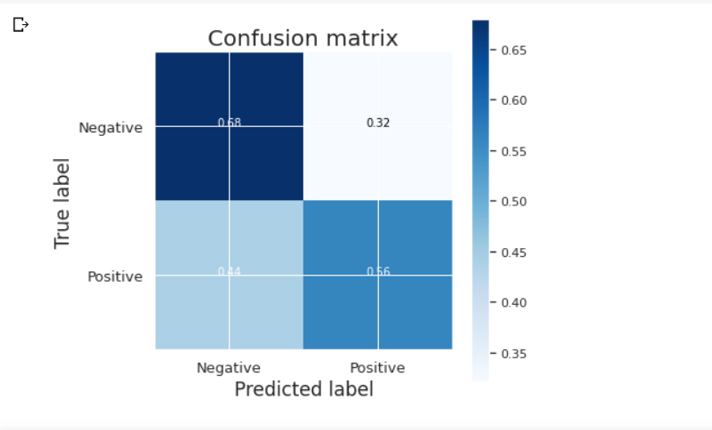

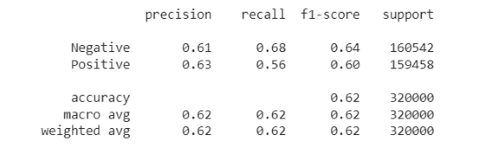

### **CONCLUSIONS**

 WE OBTAINED AN ACCURACY OF 62% BY USING THE RANDOM FOREST CLASSIFIER TO TRAIN THE DATA



## **SVM**

* Support vector machines (SVMs) are powerful yet flexible supervised machine learning methods used for classification, regression, and, outliers’ detection. SVMs are very efficient in high dimensional spaces and generally are used in classification problems.

* Scikit-learn provides three classifications of SVM namely SVC, NuSVC and LinearSVC which can perform multiclass-class classification.

* We have trained the model on linear SVC
* Between SVC and LinearSVC, one important decision criterion is that LinearSVC tends to be faster to converge the larger the number of samples is. 

## MODEL TRAINING - LINEAR SVC

In [ ]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(x_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.51      0.32      0.40     40275
           1       0.50      0.69      0.58     39726

    accuracy                           0.50     80001
   macro avg       0.50      0.50      0.49     80001
weighted avg       0.50      0.50      0.49     80001



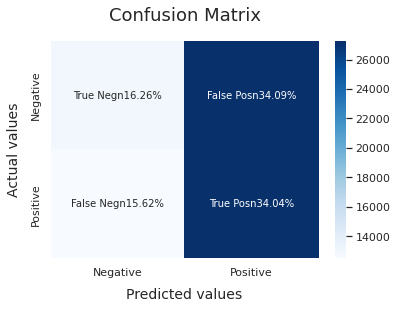

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(x_test)

### **CONCLUSIONS**

WE OBTAINED THE ACCURACY AS 50% BY TRAINING A LINEAR SVC MODEL ON THE DATASET



##WHY AND WHICH MODEL WAS CHOSEN OUT OF THE THREE MODELS WHICH WERE INITIALLY TAKEN? (BEST ACCURACY,CF MATRIX, PRECESION)

WE CHOSE THE MODEL XGBOOST, EVEN THOUGH LSTM MODEL WAS GIVING A BETTER ACCURACY OF 79% IN COMPARSION TO XGBOOST WHICH GAVE AN ACCURACY OF 72%. BECAUSE RUNTIME FOR LSTM MODEL WAS CONSIDERABLY MORE, WE SELECTED XGBOOST.


## PREDICTION USING TRAINED MODEL ON 3 TWEETS: NEGATIVE, NEUTRAL AND POSITIVE

In [ ]:
from keras.preprocessing.sequence import pad_sequences #used to ensure that all sequences in list have same length
if __name__=="__main__":
    tweets = ["I love you",
            "hi i liked the cake.",
            "I don't feel so good"]

X_train = pad_sequences(tokenizer.texts_to_sequences(tweets),
                        maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",X_train.shape)


Training X Shape: (3, 30)


In [ ]:
pred=xgb_model.predict(X_train)
print(pred)

[1 1 0]


## **CONCLUSION**
### 1 DENOTES A POSITIVE TWEET 

### 0 DENOTES A NEGATIVE TWEET

### UPON APPLYING THE TRAINED XGBOOST MODEL ON THE USER-INPUTED TWEETS WE GOT 100 PERCENT ACCURACY IN TWEET PREDICTION, AS THE ABOVE OUTPUT SUGGESTS.


THANKYOU FOR GOING THROUGH OUR PROJECT:)

TECHNICAL SUPPORT REQUIRED FROM AI CLUB TEAM FOR THE FOLLOWING:

*   ACCURACY INCREASE FOR MAKING OF RESEARCH PAPER
*   DEBUGGING IF ANY REQ/PROBLEM OR ERROR FIXING

PLS GUIDE US ON THE ABOVE IF U'RE GOING THROUGH OUR PROJECT